In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence

In [2]:
data = pd.read_csv('../data/churn.csv')
train = pd.read_csv('../data/churn_train.csv')
test = pd.read_csv('../data/churn_test.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


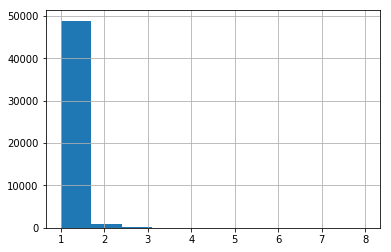

In [8]:
data['avg_surge'].hist()

There is one person who has an average surge of 8. We think this is an outlier so we should change/remove this data.

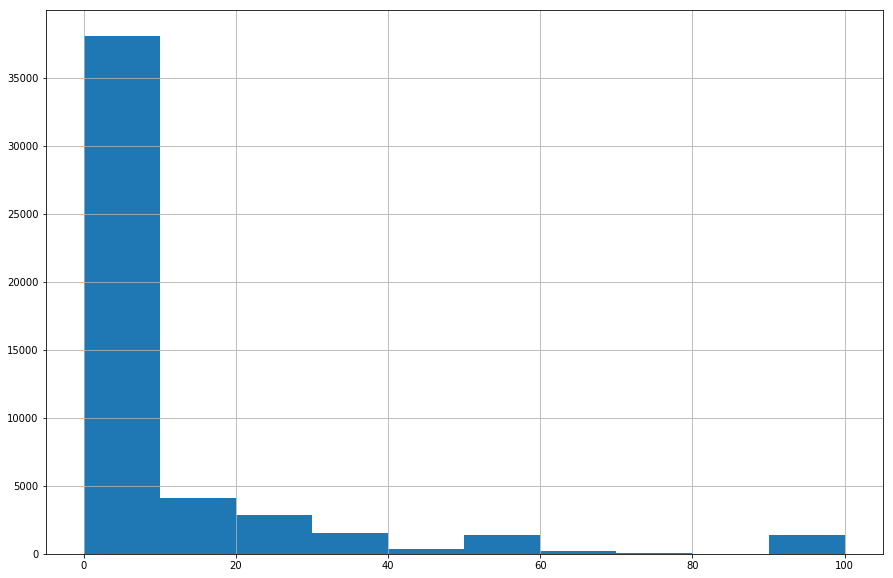

In [13]:
data['surge_pct'].hist(figsize=(15,10))

There could be two distributions here.

In [55]:
np.log(80)

4.382026634673881

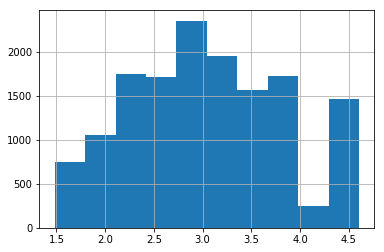

In [58]:
np.log(data['surge_pct'][data['surge_pct']+0.000001 > 4.4]).hist()

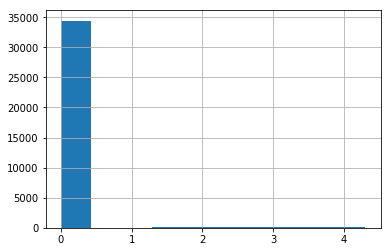

In [64]:
data['surge_pct'][data['surge_pct']+0.000001 < 4.4].hist()

In [36]:
data.trips_in_first_30_days[data.trips_in_first_30_days > 50]

99        73
3030      71
10863     53
17942     55
18514    125
29043     55
29070     63
31047     54
33488     54
36455     53
36917     56
40271     51
45489     56
48804     58
Name: trips_in_first_30_days, dtype: int64

There is one rider with 125 trips in the first 30 days.

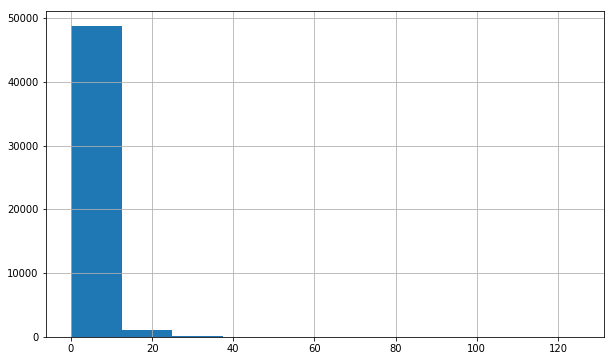

In [49]:
data.trips_in_first_30_days.hist(figsize=(10,6))

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0
28,5.97,5.0,NaN,1.50,Winterfell,2014-06-08,iPhone,2014-01-19,100.0,0,False,0.0
41,3.80,5.0,4.0,1.88,Winterfell,2014-05-10,iPhone,2014-01-18,50.0,0,False,0.0
42,5.72,5.0,4.0,1.50,Winterfell,2014-01-26,Android,2014-01-25,100.0,1,False,0.0
47,3.61,5.0,5.0,1.25,Winterfell,2014-01-19,iPhone,2014-01-18,100.0,1,False,0.0
50,3.25,5.0,5.0,1.25,Winterfell,2014-02-15,Android,2014-01-04,100.0,0,False,0.0
59,6.05,4.5,5.0,1.25,Astapor,2014-03-29,iPhone,2014-01-25,100.0,1,False,0.0
60,3.01,5.0,NaN,1.00,Astapor,2014-01-05,iPhone,2014-01-04,0.0,1,True,0.0
61,4.66,5.0,NaN,1.00,Astapor,2014-02-02,iPhone,2014-01-31,0.0,1,False,0.0
68,4.44,5.0,5.0,1.00,King's Landing,2014-06-15,iPhone,2014-01-01,0.0,0,True,0.0
